# Visualizing distributions of data

An early step in any effort to analyze or model data should be to understand how the variables are distributed. Techniques for distribution visualization can provide quick answers to many important questions. What range do the observations cover? What is their central tendency? Are they heavily skewed in one direction? Is there evidence for bimodality? Are there significant outliers? Do the answers to these questions vary across subsets defined by other variables?

The distributions module contains several functions designed to answer questions such as these. The axes-level functions are **```histplot(), kdeplot(), ecdfplot(), and rugplot()```**. They are grouped together within the figure-level **```displot(), jointplot(), and pairplot()```** functions.

There are several different approaches to visualizing a distribution, and each has its relative advantages and drawbacks. It is important to understand these factors so that you can choose the best approach for your particular aim.

## Plotting univariate histograms

Perhaps the most common approach to visualizing a distribution is the histogram. This is the default approach in **```displot()```**, which uses the same underlying code as **```displot()```**. A histogram is a bar plot where the axis representing the data variable is divided into a set of discrete bins and the count of observations falling within each bin is shown using the height of the corresponding bar:

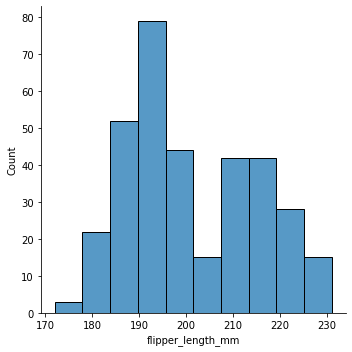

In [1]:
import seaborn as sns

penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

### Choosing the bin size

The size of the bins is an important parameter, and using the wrong bin size can mislead by obscuring important features of the data or by creating apparent features out of random variability. To choose the size directly, set the **```binwidth```** parameter:

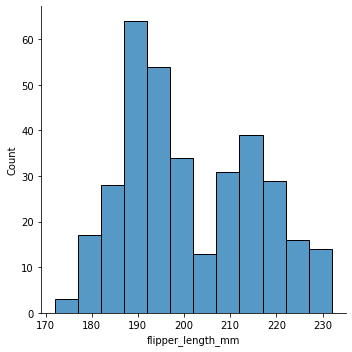

In [2]:
# binwidth
sns.displot(penguins, x="flipper_length_mm", binwidth=5)

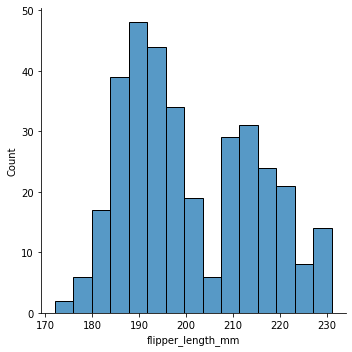

In [3]:
##### bins
sns.displot(penguins, x="flipper_length_mm", bins=15)

One example of a situation where defaults fail is when the variable takes a relatively small number of integer values. In that case, the default bin width may be too small, creating awkward gaps in the distribution:

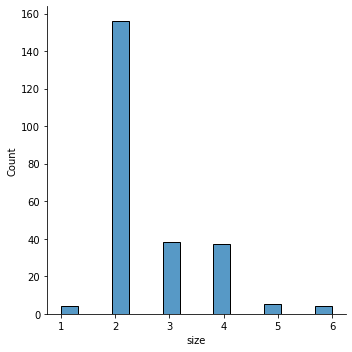

In [4]:
tips = sns.load_dataset("tips")
sns.displot(tips, x="size")

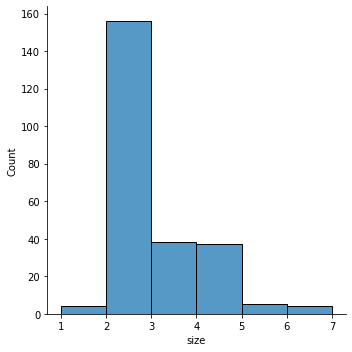

In [5]:
# passing array to bins
sns.displot(tips, x="size", bins=[1,2,3,4,5,6,7])

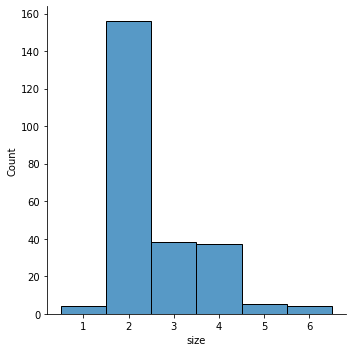

In [6]:
# setting discrete=True
sns.displot(tips, x="size", discrete=True)

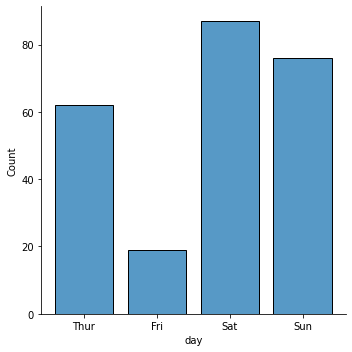

In [7]:
# shrink
sns.displot(tips, x="day", shrink=0.8)

### Conditioning on other variables

Once you understand the distribution of a variable, the next step is often to ask whether features of that distribution differ across other variables in the dataset. For example, what accounts for the bimodal distribution of flipper lengths that we saw above? **```displot()```** and **```histplot()```** provide support for conditional subsetting via the **```hue```** semantic. Assigning a variable to **```hue```** will draw a separate histogram for each of its unique values and distinguish them by color:

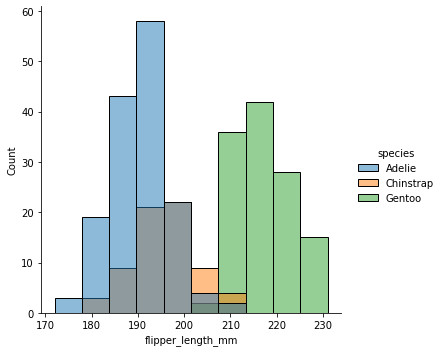

In [8]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

By default, the different histograms are “layered” on top of each other and, in some cases, they may be difficult to distinguish. One option is to change the visual representation of the histogram from a bar plot to a “step” plot:

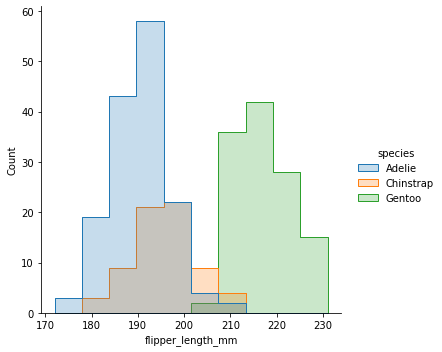

In [9]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

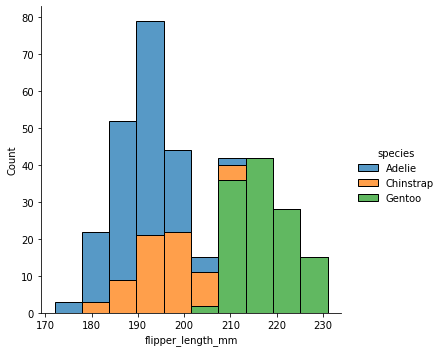

In [10]:
# stacked
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

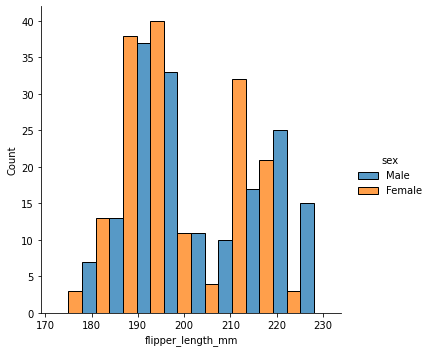

In [11]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

Because **```displot()```** is a figure-level function and is drawn onto a **```FacetGrid```**, it is also possible to draw each individual distribution in a separate subplot by assigning the second variable to ```col``` or ```row``` rather than (or in addition to) ```hue```. This represents the distribution of each subset well, but it makes it more difficult to draw direct comparisons:

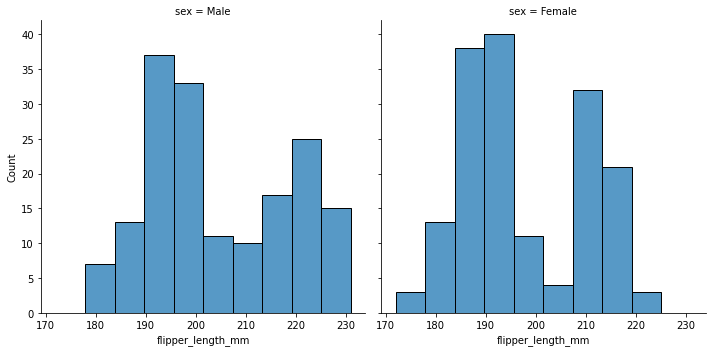

In [12]:
sns.displot(penguins, x="flipper_length_mm", col="sex")

### Normalized histogram statistics

Before we do, another point to note is that, when the subsets have unequal numbers of observations, comparing their distributions in terms of counts may not be ideal. One solution is to ***normalize*** the counts using the ``stat`` parameter:

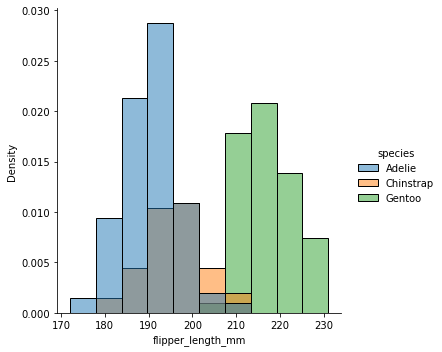

In [13]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

By default, however, the normalization is applied to the entire distribution, so this simply rescales the height of the bars. By setting **```common_norm=False```**, each subset will be normalized independently:

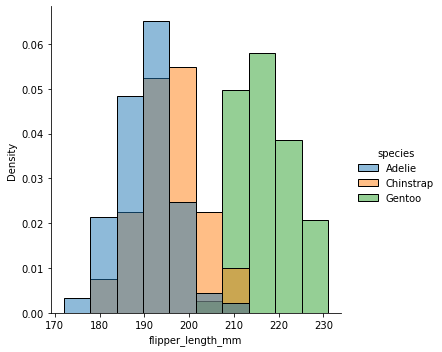

In [14]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density", common_norm=False)

## Kernel density estimation (KDE)

A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate:

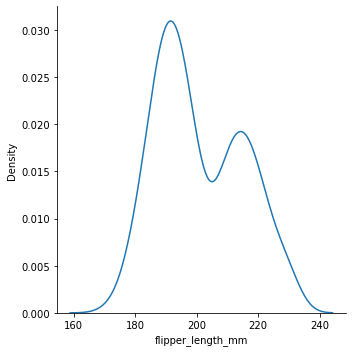

In [15]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

### Choosing the smoothing bandwidth

Much like with the bin size in the histogram, the ability of the KDE to accurately represent the data depends on the choice of smoothing bandwidth. An over-smoothed estimate might erase meaningful features, but an under-smoothed estimate can obscure the true shape within random noise. The easiest way to check the robustness of the estimate is to adjust the default bandwidth:

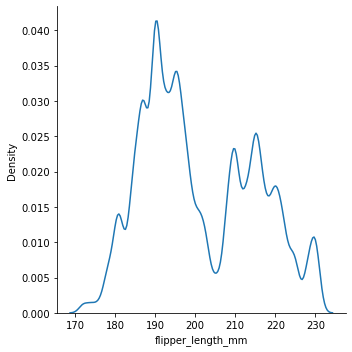

In [16]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25)

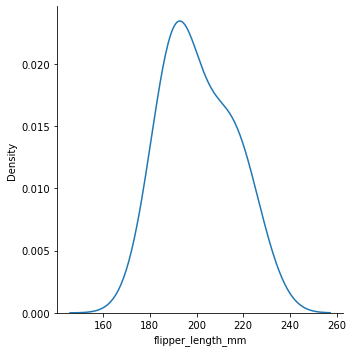

In [17]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=2)

### Conditioning on other variables
As with histograms, if you assign a ```hue``` variable, a separate density estimate will be computed for each level of that variable:

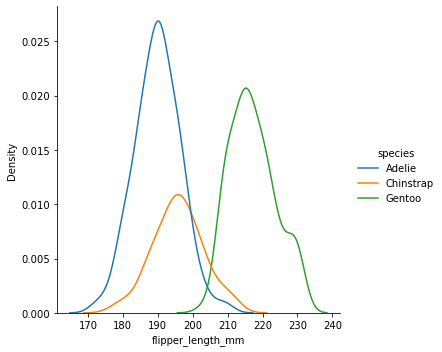

In [18]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

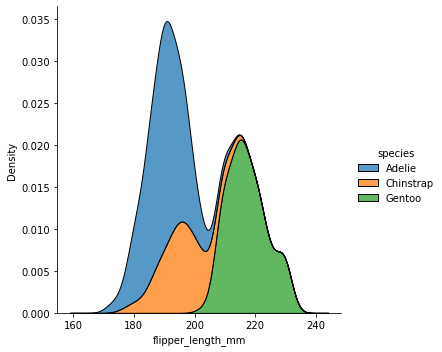

In [19]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack")

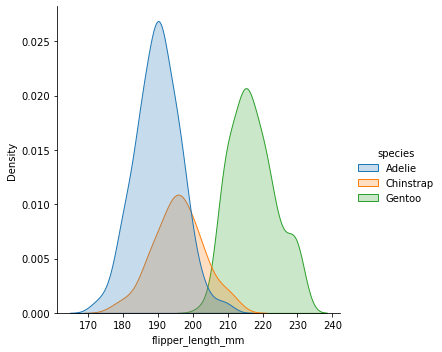

In [20]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

### Kernel density estimation pitfalls

KDE plots have many advantages. Important features of the data are easy to discern (central tendency, bimodality, skew), and they afford easy comparisons between subsets. But there are also situations where KDE poorly represents the underlying data. This is because the logic of KDE assumes that the underlying distribution is smooth and unbounded. One way this assumption can fail is when a variable reflects a quantity that is naturally bounded. If there are observations lying close to the bound (for example, small values of a variable that cannot be negative), the KDE curve may extend to unrealistic values:

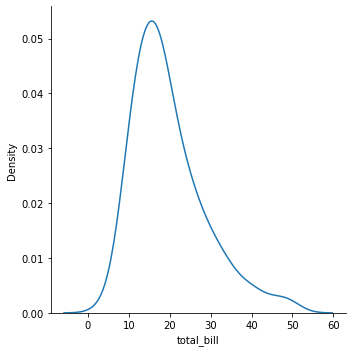

In [21]:
sns.displot(tips, x="total_bill", kind="kde")

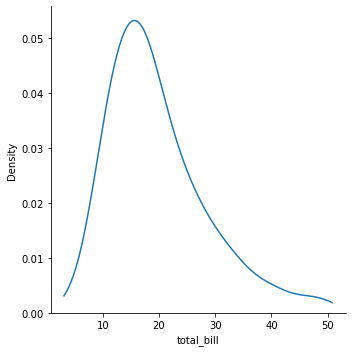

In [22]:
sns.displot(tips, x="total_bill", kind="kde", cut=0)

The KDE approach also fails for discrete data or when data are naturally continuous but specific values are over-represented. The important thing to keep in mind is that the KDE will *always show you a smooth curve*, even when the data themselves are not smooth. For example, consider this distribution of diamond weights:

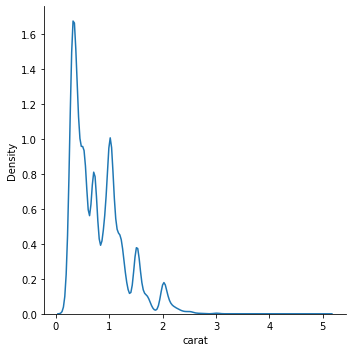

In [23]:
diamonds = sns.load_dataset("diamonds")
sns.displot(diamonds, x="carat", kind="kde")

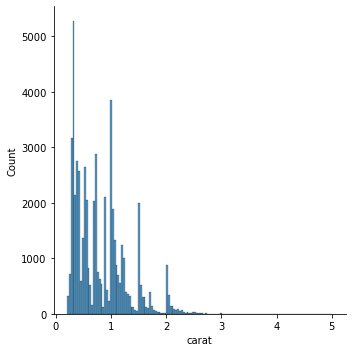

In [24]:
sns.displot(diamonds, x="carat")

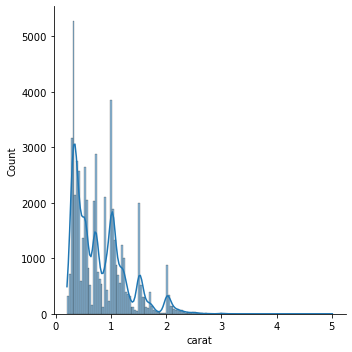

In [25]:
sns.displot(diamonds, x="carat", kde=True)

## Empirical cumulative distributions (ECDF)

A third option for visualizing distributions computes the “empirical cumulative distribution function” (ECDF). This plot draws a monotonically-increasing curve through each datapoint such that the height of the curve reflects the proportion of observations with a smaller value:

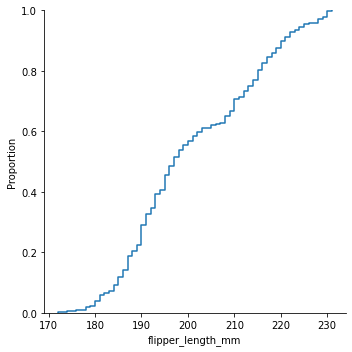

In [26]:
sns.displot(penguins, x="flipper_length_mm", kind="ecdf")

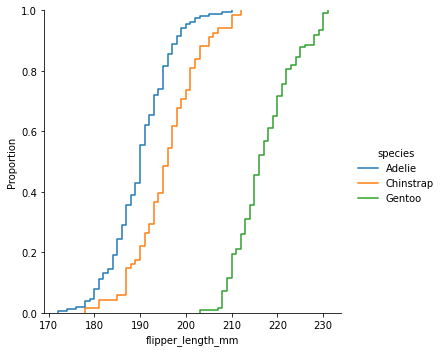

In [27]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")

## Visualizing bivariate distributions

All of the examples so far have considered *univariate* distributions: distributions of a single variable, perhaps conditional on a second variable assigned to ```hue```. Assigning a second variable to ``y``, however, will plot a bivariate distribution:

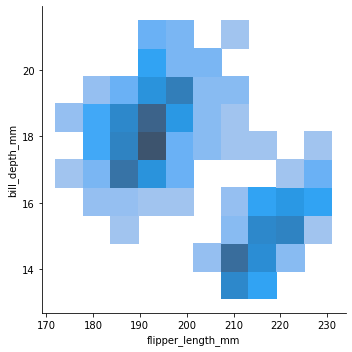

In [28]:
sns.displot(penguins, x="flipper_length_mm", y="bill_depth_mm")

A bivariate histogram bins the data within rectangles that tile the plot and then shows the count of observations within each rectangle with the fill color (analogous to a **```heatmap()```**). Similarly, a bivariate KDE plot smoothes the (x, y) observations with a 2D Gaussian. The default representation then shows the *contours* of the 2D density:

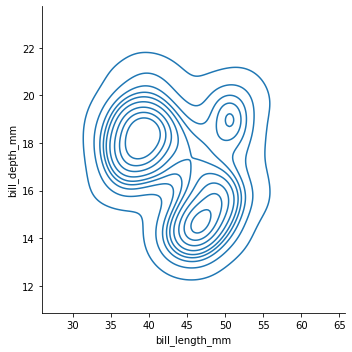

In [29]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

Assigning a **```hue```** variable will plot multiple heatmaps or contour sets using different colors. For bivariate histograms, this will only work well if there is minimal overlap between the conditional distributions:

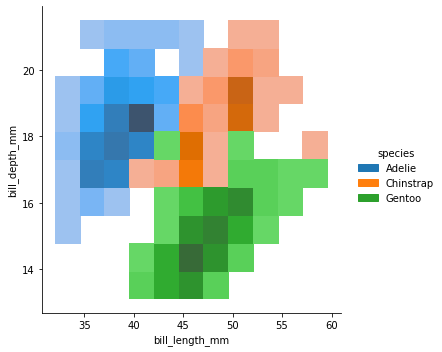

In [30]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

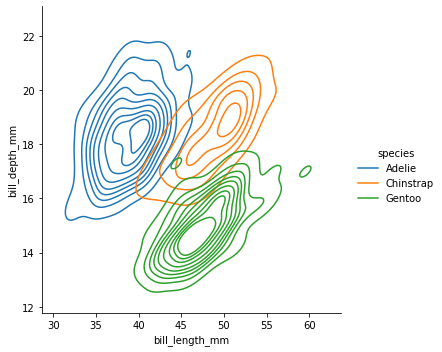

In [31]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

Just as with univariate plots, the choice of bin size or smoothing bandwidth will determine how well the plot represents the underlying bivariate distribution. The same parameters apply, but they can be tuned for each variable by passing a pair of values:

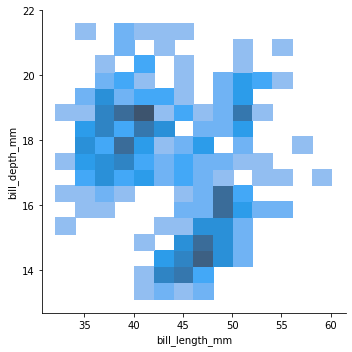

In [32]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5))

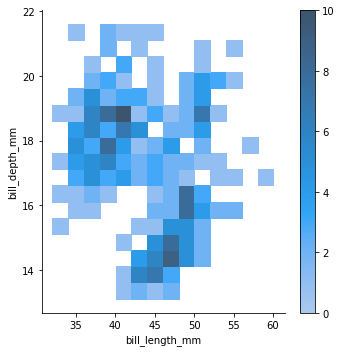

In [33]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), cbar=True)

The meaning of the bivariate density contours is less straightforward. Because the density is not directly interpretable, the contours are drawn at iso-proportions of the density, meaning that each curve shows a level set such that some proportion p of the density lies below it. The p values are evenly spaced, with the lowest level contolled by the **```thresh```** parameter and the number controlled by ```levels:```

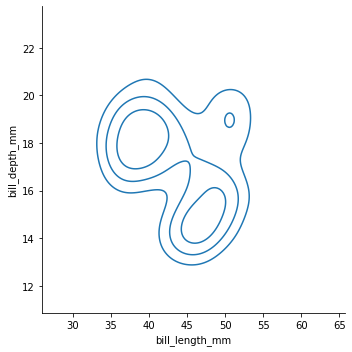

In [34]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", thresh=.2, levels=4)

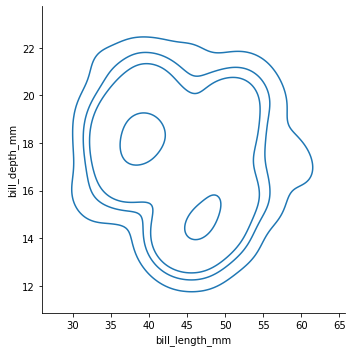

In [35]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", levels=[.01, .05, .1, .8])

## Distribution visualization in other settings

Several other figure-level plotting functions in seaborn make use of the **```histplot()```** and **```kdeplot()```** functions.

### Plotting joint and marginal distributions

The first is **```jointplot()```**, which augments a bivariate relatonal or distribution plot with the marginal distributions of the two variables. By default, **```jointplot()```** represents the bivariate distribution using **```scatterplot()```** and the marginal distributions using **```histplot()```**:

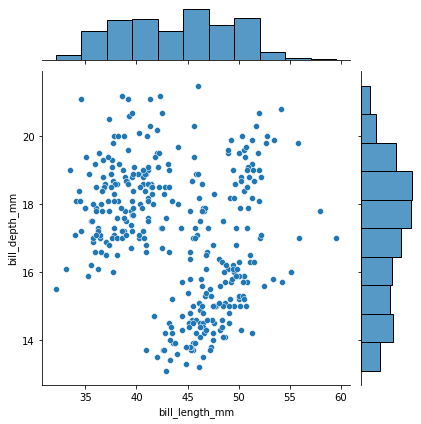

In [36]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

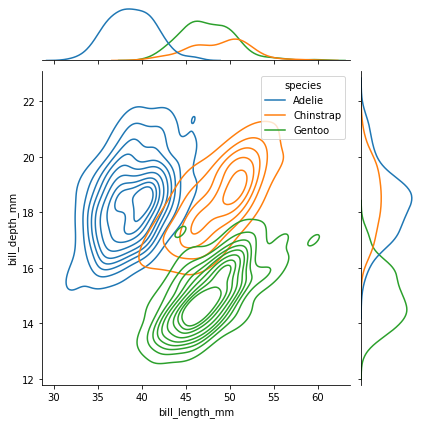

In [37]:
# kde
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)

**```jointplot()```** is a convenient interface to the ```JointGrid``` class, which offeres more flexibility when used directly:

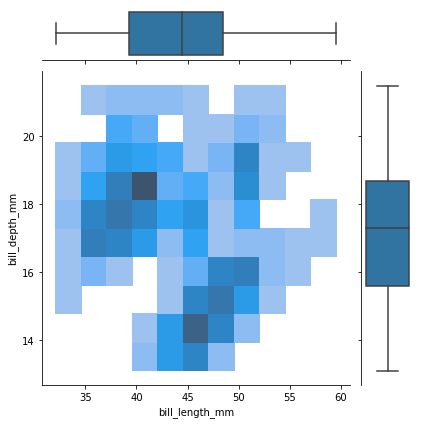

In [38]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

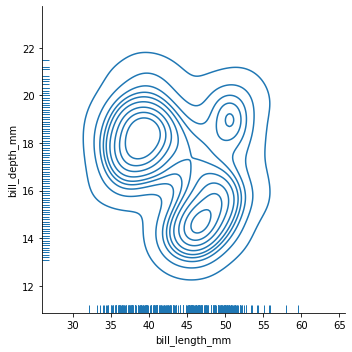

In [39]:
sns.displot(
    penguins, x="bill_length_mm", y="bill_depth_mm",
    kind="kde", rug=True
)

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

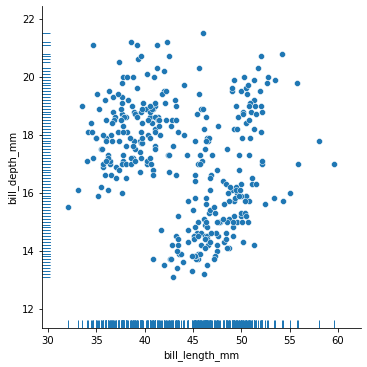

In [40]:
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
sns.rugplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

### Plotting many distributions

The **```pairplot()```** function offers a similar blend of joint and marginal distributions. Rather than focusing on a single relationship, however, **```pairplot()```** uses a “small-multiple” approach to visualize the univariate distribution of all variables in a dataset along with all of their pairwise relationships:

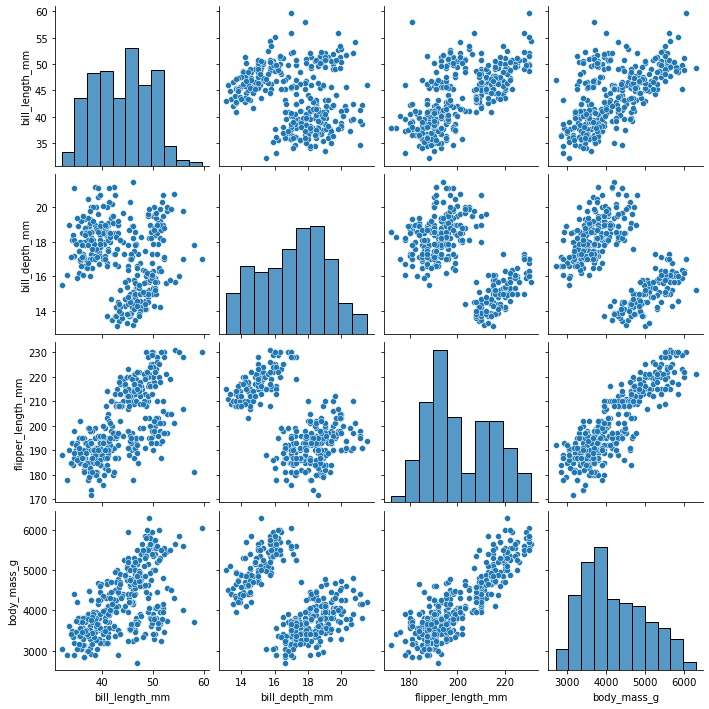

In [41]:
sns.pairplot(penguins)

using the underlying **```PairGrid```** directly will afford more flexibility with only a bit more typing:

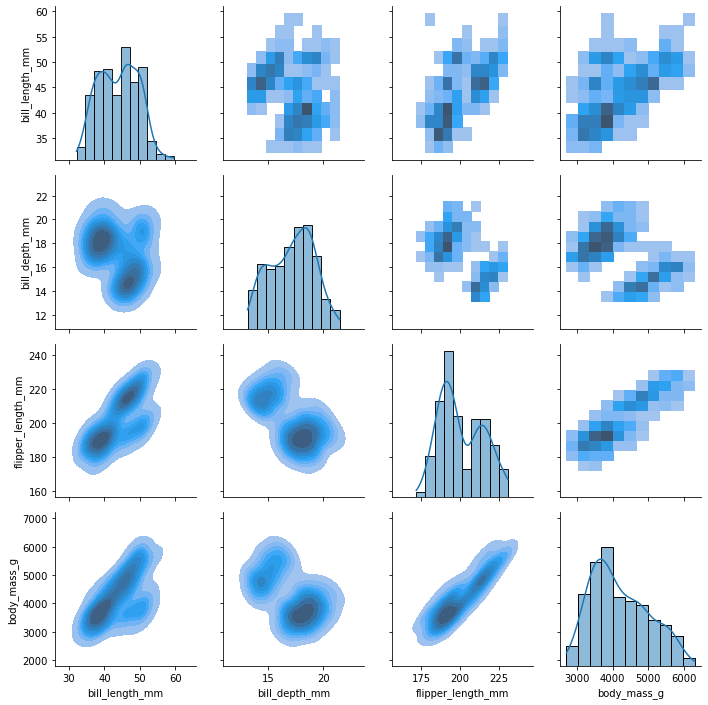

In [42]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)